# CASE-STUDY: SANTANDER CUSTOMER SATISFACTION

About Santander Customer Satisfaction Problem:-

Santander Customer Satisfaction – Which customers are happy customers?” is a Featured Prediction Competition hosted by Kaggle in 2016 on the behalf of “Banco Santander” Bank, which is a large Corporation focusing primarily on the market in the north-eastern part of United States.
Kaggle introduces the problem to its readers by harping on the significance of “customer satisfaction” as the key measure of a business success. They further impinge upon the fact that unhappy customers rarely express their dis-satisfaction before leaving. Therefore, it is expected of the participants in the Competition to help identify dis-satisfied customers early on in the relationship so that proactive steps can be taken to improve customer satisfaction early on.The data shared by Santander Bank constitutes of Train-set with 76020 observations, 370 features and one binary target, a Test-set with 75818 observations and 370 features and also a sample submission file. The data consists of hundreds of anonymized features, which are to be leveraged effectively to find an appropriate model and consequently enable prediction with respect to a client’s satisfaction/dis-satisfaction in the near future. In order to evaluate the Machine-Learning models, the evaluation metric used by Santander Bank is “AUC”. The top leadership score obtained was 0.829072. The utility of the model would be that it will help the prestigious Santander Bank to identify dis-satisfied customers as early as possible so that they may be in a position to take necessary action to retain those customers.

# BASE-LINE MODELS

In [2]:
#import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='muted',style='whitegrid')
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics,ensemble,model_selection,linear_model,tree,calibration

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv('D:/santander_train.csv')
test_data = pd.read_csv('D:/santander_test.csv')

In [5]:
print("The number of observations in Santander Train-Data are:",train_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Train-Data are: 76020
The number of features in Santander Train-Data are: 370


In [6]:
print("The number of observations in Santander Test-Data are:",test_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Test-Data are: 75818
The number of features in Santander Train-Data are: 370


In [7]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
test_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [9]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
test_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668954,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [13]:
train_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [14]:
test_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object

In [15]:
y_train = train_data['TARGET']

In [16]:
y_train.shape

(76020,)

In [17]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

Firstly, getting those columns which have less than or equal to 10 nunique values
Those features will be identified as "categorical"

In [18]:


categorical_feat = []
for column in train_data.columns:
    if (train_data[column].nunique()<=10) & (column!='TARGET') & (train_data[column].nunique()>2) & (column!='ID'):
        categorical_feat.append(column)


In [19]:
len(categorical_feat)

99

In [20]:
type(categorical_feat)

list

So, there are 99 features with more than 2 and less than or equal to 10 unique values

In [21]:
train_data[categorical_feat].shape

(76020, 99)

 Now identify those features which have only 2 unique values


In [22]:

caty_feat_two = []
for column in train_data.columns:
    if (train_data[column].nunique()==2) & (column!='TARGET') & (column!='ID'):
        caty_feat_two.append(column)


In [23]:
len(caty_feat_two)

105

Hence, there are 105 features with 2 unique values

In [24]:
#train_data[caty_feat_two]

In [25]:
train_data[caty_feat_two].shape

(76020, 105)

 Now identify those features which have only 1 unique values

In [26]:


caty_feat_one = []
for column in train_data.columns:
    if (train_data[column].nunique()==1) & (column!='TARGET') & (column!='ID'):
        caty_feat_one.append(column)


In [27]:
len(caty_feat_one)

34

Hence, there are 34 features with only 1 unique value

In [28]:
#train_data[caty_feat_one]

In [29]:
train_data[caty_feat_one].shape

(76020, 34)

 Now identify those features which have more than 10 unique values

In [30]:


numerical_feat = []
for column in train_data.columns:
    if (train_data[column].nunique()>10) & (column!='TARGET') & (column!='ID'):
        numerical_feat.append(column)


In [31]:
len(numerical_feat)

131

Thus, there are 131 features with more than 10 unique values and we identify such features as "numerical-features"

In [32]:
train_data[numerical_feat].shape

(76020, 131)

ENCODING OF NUMERICAL FEATURES USING MIN-MAX SCALAR

In [33]:
from sklearn import preprocessing  #Ref: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
    
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
train_data_num = min_max_scaler.fit_transform(train_data[numerical_feat])
  
print ("\nAfter min max Scaling : \n", train_data_num)
print("shape", train_data_num.shape)
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
train_data_numy = Standardisation.fit_transform(train_data[numerical_feat])
  
print ("\nAfter Standardisation : \n", train_data_numy)
print("shape", train_data_numy.shape)


After min max Scaling : 
 [[0.99976406 0.18       0.         ... 0.         0.         0.00154526]
 [0.99976406 0.29       0.         ... 0.         0.         0.0020025 ]
 [0.99976406 0.18       0.         ... 0.         0.         0.00282212]
 ...
 [0.99976406 0.18       0.         ... 0.         0.         0.003126  ]
 [0.99976406 0.2        0.         ... 0.         0.         0.00359128]
 [0.99976406 0.41       0.         ... 0.         0.         0.00509076]]
shape (76020, 131)

After Standardisation : 
 [[ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -4.27182680e-01]
 [ 3.90744048e-02  6.07525955e-02 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -3.72038298e-01]
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.73191237e-01]
 ...
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.36542515e-01]
 [ 3.90744048e-02 -6.33884772e-01 -5.33881045e-02 ... -1.8

In [34]:
from sklearn import preprocessing  #Ref: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
    
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
test_data_num = min_max_scaler.fit_transform(test_data[numerical_feat])
  
print ("\nAfter min max Scaling : \n", test_data_num)
print("shape", test_data_num.shape)
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
test_data_numy = Standardisation.fit_transform(test_data[numerical_feat])
  
print ("\nAfter Standardisation : \n", test_data_numy)
print("shape", test_data_numy.shape)


After min max Scaling : 
 [[0.99976406 0.27       0.         ... 0.         0.         0.0013612 ]
 [0.99976406 0.3        0.         ... 0.         0.         0.00153268]
 [0.99976406 0.18       0.         ... 0.         0.         0.00158484]
 ...
 [0.99976406 0.19       0.         ... 0.         0.         0.00574866]
 [0.99976406 0.35       0.         ... 0.         0.         0.00401853]
 [0.99976406 0.18       0.         ... 0.         0.         0.00401853]]
shape (75818, 131)

After Standardisation : 
 [[ 3.97953966e-02 -8.80637178e-02 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -3.09975237e-01]
 [ 3.97953966e-02  1.43920495e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -2.89991833e-01]
 [ 3.97953966e-02 -7.84016356e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -2.83912742e-01]
 ...
 [ 3.97953966e-02 -7.06688285e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02  2.01315149e-01]
 [ 3.97953966e-02  5.30560850e-01 -4.90684752e-02 ... -2.0

In [35]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ONE-HOT ENCODING OF FEATURES WITH LESS THAN 10 UNIQUE VALUES

In [36]:
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data[categorical_feat])

train_data_cat = enc.transform(train_data[categorical_feat]).toarray()


test_data_cat = enc.transform(test_data[categorical_feat]).toarray()

#enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

print("After vectorizations")
print(train_data_cat.shape)
print(test_data_cat.shape)


After vectorizations
(76020, 507)
(75818, 507)


In [37]:
type(train_data[categorical_feat])

pandas.core.frame.DataFrame

In [38]:
train_data_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
train_data_array = np.array(train_data)

In [40]:
train_data_array.shape

(76020, 371)

In [41]:
train_data_categorical_array = np.array(train_data[categorical_feat])

In [42]:
train_data_categorical_array.shape

(76020, 99)

In [43]:
test_data_categorical_array = np.array(test_data[categorical_feat])

In [44]:
test_data_categorical_array.shape

(75818, 99)

In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data_categorical_array)

train_data_cat_array = enc.transform(train_data_categorical_array)


test_data_cat_array = enc.transform(test_data_categorical_array)

print("After vectorizations")
print(train_data_cat_array.shape)
print(test_data_cat_array.shape)


After vectorizations
(76020, 507)
(75818, 507)


In [46]:
train_data_cat_array

<76020x507 sparse matrix of type '<class 'numpy.float64'>'
	with 7525980 stored elements in Compressed Sparse Row format>

In [47]:
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data[caty_feat_two])

train_data_cat_two = enc.transform(train_data[caty_feat_two]).toarray()


test_data_cat_two = enc.transform(test_data[caty_feat_two]).toarray()

#enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

print("After vectorizations")
print(train_data_cat_two.shape)
print(test_data_cat_two.shape)


After vectorizations
(76020, 210)
(75818, 210)


In [48]:
train_data_cat_two

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [49]:
train_data_cat_two_array = np.array(train_data[caty_feat_two])

In [50]:
train_data_cat_two_array.shape

(76020, 105)

In [51]:
test_data_cat_two_array = np.array(test_data[caty_feat_two])

In [52]:
test_data_cat_two_array.shape

(75818, 105)

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data_cat_two_array)

train_data_cat_two_arr = enc.transform(train_data_cat_two_array)


test_data_cat_two_arr = enc.transform(test_data_cat_two_array)

print("After vectorizations")
print(train_data_cat_two_arr.shape)
print(test_data_cat_two_arr.shape)


After vectorizations
(76020, 210)
(75818, 210)


In [54]:
train_data_cat_one = np.array(train_data[caty_feat_one])

In [55]:
train_data_cat_one.shape

(76020, 34)

In [56]:
test_data_cat_one = np.array(test_data[caty_feat_one])

In [57]:
test_data_cat_one.shape

(75818, 34)

STACKING ALL THE FEATURES TOGETHER

In [58]:
from scipy.sparse import hstack #stack sparse matrices horizontally

In [59]:
Xi_train=np.hstack([train_data_cat, train_data_cat_two, train_data_cat_one, train_data_num])

In [60]:
Xi_train.shape

(76020, 882)

In [61]:
Xi_test=np.hstack([test_data_cat, test_data_cat_two, test_data_cat_one, test_data_num])

In [62]:
Xi_test.shape

(75818, 882)

In [63]:
from scipy.sparse import hstack
import scipy.sparse as sp
#Reference: https://www.programcreek.com/python/example/104973/scipy.sparse.hstack

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# LOGISTIC REGRESSION

In [70]:
import sklearn
from sklearn import linear_model

In [71]:

mudel = linear_model.LogisticRegression(class_weight='balanced')
params = {'penalty':['l2','l1'], 'C':[10.**i for i in np.arange(-3,3,1)], 
          'fit_intercept':[True,False],}

In [84]:

def best_params(model,params,cv=4,n_jobs=-1,train=Xi_train):
  
    random_cv = RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',n_jobs=n_jobs,cv=cv,verbose=2)
    random_cv.fit(Xi_train,y_train)
    print("The best auc score is:",random_cv.best_score_)
    print("The best params are::",random_cv.best_params_)
    return random_cv.best_estimator_

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

In [88]:
best_params(mudel,params,cv=2,train=Xi_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
The best auc score is: 0.7884318017964986
The best params are:: {'penalty': 'l2', 'fit_intercept': True, 'C': 1.0}


LogisticRegression(class_weight='balanced')

In [89]:
muudel = linear_model.LogisticRegression(C=1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [90]:
muudel.fit(Xi_train,y_train)

LogisticRegression(C=1, class_weight='balanced')

In [127]:
from sklearn.metrics import roc_curve, auc

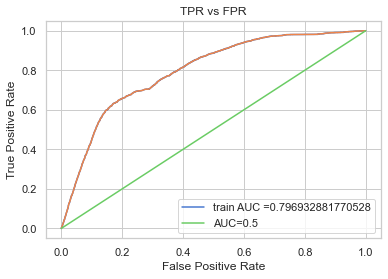

In [93]:
y_train_pred = muudel.predict_proba(Xi_train) [:,1]
y_test_pred = muudel.predict_proba(Xi_test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
sns.lineplot(train_fpr, train_tpr)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [101]:
log_loss = metrics.log_loss(y_train,y_train_pred) #getting logloss
print(log_loss)
print("The log loss after applying Logistic Regression is found to be:",(log_loss))
    

0.5638735064760584
The log loss after applying Logistic Regression is found to be: 0.5638735064760584


# DECISION TREES

In [103]:
model_dec = tree.DecisionTreeClassifier(class_weight='balanced')
params = { 'max_depth':[10,100,500,1000], 
         'min_samples_split':[2,5,10,100,500], 
          'min_samples_leaf':[1,3,5,7,10],
          'max_leaf_nodes':[100,500,1000,5000] }

In [104]:
best_params(model_dec,params,cv=2,n_jobs=-1,train=Xi_train)
  

Fitting 2 folds for each of 10 candidates, totalling 20 fits
The best auc score is: 0.7917399598987518
The best params are:: {'min_samples_split': 500, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 100}


DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=500)

In [106]:
mudel_decy = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, splitter='best')

mudel_decy.fit(Xi_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=500)

In [107]:
fi_model = calibration.CalibratedClassifierCV(mudel_decy,cv='prefit')
fi_model.fit(Xi_train,y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                             max_depth=100,
                                                             max_leaf_nodes=100,
                                                             min_samples_leaf=3,
                                                             min_samples_split=500),
                       cv='prefit')

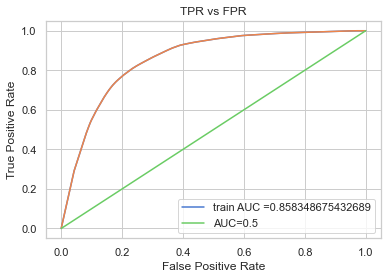

In [108]:
y_tr_pred = fi_model.predict_proba(Xi_train) [:,1]
y_te_pred = muudel.predict_proba(Xi_test) [:,1]
tr_fpr, tr_tpr, tr_thresh = roc_curve(y_train, y_tr_pred)
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
sns.lineplot(tr_fpr, tr_tpr)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [109]:
log_loss = metrics.log_loss(y_train,y_tr_pred) #getting logloss
print(log_loss)
print("The log loss after applying Decision Tree Classifier is found to be:",(log_loss))
    

0.1305651120145573
The log loss after applying Decision Tree Classifier is found to be: 0.1305651120145573


# RANDOM FOREST

In [110]:
model_ran = ensemble.RandomForestClassifier(class_weight='balanced')
params = { 'n_estimators':[1000,2000],
          'max_depth':[500,1000], 
         'min_samples_split':[100,500],
          'min_samples_leaf':[3,5],
          'max_leaf_nodes':[100,250] 
          }

In [111]:
best_params(model_ran,params,cv=2,n_jobs=-1,train=Xi_train)
  

Fitting 2 folds for each of 10 candidates, totalling 20 fits
The best auc score is: 0.8141706895529269
The best params are:: {'n_estimators': 2000, 'min_samples_split': 500, 'min_samples_leaf': 3, 'max_leaf_nodes': 250, 'max_depth': 1000}


RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       max_leaf_nodes=250, min_samples_leaf=3,
                       min_samples_split=500, n_estimators=2000)

In [113]:
mudel_ran = ensemble.RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=250, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False,
                       verbose=0, warm_start=False)
mudel_ran.fit(Xi_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       max_leaf_nodes=250, min_samples_leaf=3,
                       min_samples_split=500, n_estimators=2000, n_jobs=-1)

In [114]:
ran_model = calibration.CalibratedClassifierCV(mudel_ran,cv='prefit')
ran_model.fit(Xi_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=1000,
                                                             max_leaf_nodes=250,
                                                             min_samples_leaf=3,
                                                             min_samples_split=500,
                                                             n_estimators=2000,
                                                             n_jobs=-1),
                       cv='prefit')

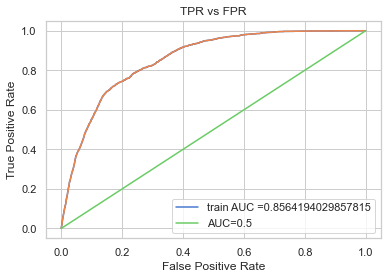

In [115]:
y_tr_predi = ran_model.predict_proba(Xi_train) [:,1]
y_te_predi = ran_model.predict_proba(Xi_test) [:,1]
train_fpr_s, train_tpr_s, train_threshy = roc_curve(y_train, y_tr_predi)
plt.plot(train_fpr_s, train_tpr_s, label="train AUC ="+str(auc(train_fpr_s, train_tpr_s)))
sns.lineplot(train_fpr_s, train_tpr_s)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [116]:
log_loss = metrics.log_loss(y_train,y_tr_predi) #getting logloss
print(log_loss)
print("The log loss after applying Random-Forest is found to be:",(log_loss))
    

0.13140119271333225
The log loss after applying Random-Forest is found to be: 0.13140119271333225


In [ ]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# LIGHT GBM CLASSIFIER

In [118]:
import lightgbm as lgb

In [122]:
X_train,X_val,y_train,y_val = model_selection.train_test_split(Xi_train,y_train,stratify=y_train,test_size=0.20)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(60816, 882)
(15204, 882)
(60816,)
(15204,)


In [119]:
model_light = lgb.LGBMClassifier(n_jobs=-1,nthread=-1,scale_pos_weight=1,learning_rate=0.02,colsample_bytree = 0.5,
                      subsample = 0.8, objective='binary', n_estimators=375,reg_alpha = 0.4,
                      max_depth=7, random_state=42)

In [124]:
evaluation_metrics = ['auc','error']


In [125]:
model_light.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric=evaluation_metrics,verbose=True)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[1]	valid_0's auc: 0.746654	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.165773
[2]	valid_0's auc: 0.757075	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.165043
[3]	valid_0's auc: 0.760064	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.16435
[4]	valid_0's auc: 0.761385	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.163643
[5]	valid_0's auc: 0.798646	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.162192
[6]	valid_0's auc: 0.806739	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.160987
[7]	valid_0's auc: 0.814168	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.159813
[8]	valid_0's auc: 0.813085	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.159149
[9]	valid_0's auc: 0.813058	valid_0's binary_error: 0.0395948	valid_0's binary_logloss: 0.158525
[10]	valid_0's

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=7,
               n_estimators=375, nthread=-1, objective='binary',
               random_state=42, reg_alpha=0.4, scale_pos_weight=1,
               subsample=0.8)

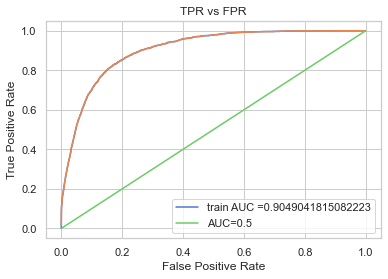

In [128]:
y_train_prr = model_light.predict_proba(X_train) [:,1]
y_test_prr = model_light.predict_proba(X_val) [:,1]
train_fpr_t, train_tpr_t, train_threshy_t = roc_curve(y_train, y_train_prr)
plt.plot(train_fpr_t, train_tpr_t, label="train AUC ="+str(auc(train_fpr_t, train_tpr_t)))
sns.lineplot(train_fpr_t, train_tpr_t)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [131]:
log_loss = metrics.log_loss(y_train,y_train_prr) #getting logloss
print(log_loss)
print("The log loss after applying Light-GBM is found to be:",(log_loss))
    

0.11535545817609678
The log loss after applying Light-GBM is found to be: 0.11535545817609678


In [132]:
#  compare all models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

p = PrettyTable()
p.field_names = ["Model",  "Parameter:Log-Loss", "Parameter:Train-AUC"]
p.add_row(["Logistic-Regression",0.5638, 0.7969])
p.add_row(["Decision-Trees", 0.1305, 0.8583])
p.add_row(["Random-Forest", 0.1314, 0.8564])
p.add_row(["Light-GBM", 0.1153, 0.9049])
print(p)

+---------------------+--------------------+---------------------+
|        Model        | Parameter:Log-Loss | Parameter:Train-AUC |
+---------------------+--------------------+---------------------+
| Logistic-Regression |       0.5638       |        0.7969       |
|    Decision-Trees   |       0.1305       |        0.8583       |
|    Random-Forest    |       0.1314       |        0.8564       |
|      Light-GBM      |       0.1153       |        0.9049       |
+---------------------+--------------------+---------------------+


In [ ]:
# THANK-YOU